# **Assignment on Uber dataset**

**Load the dataset**

In [2]:
import pandas as pd
uber_data=pd.read_csv("Uber.csv")
uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


**Display basic info about dataset**

In [3]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


**Check for missing values**

In [4]:
ms=uber_data.isnull().sum()
print(ms)

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


**Drop rows with missing values**

In [5]:
clean=uber_data.dropna()
clean

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


**fill missing values (propose column with unknown value)**

In [8]:
uber_data['PURPOSE*'] = uber_data['PURPOSE*'].fillna('Unknown')
print(uber_data['PURPOSE*'].isnull().sum())

0


**Check and remove duplicates**

In [11]:
dup = uber_data.duplicated()
print(uber_data[dup])

         START_DATE*        END_DATE* CATEGORY*  START* STOP*  MILES* PURPOSE*
492  6/28/2016 23:34  6/28/2016 23:59  Business  Durham  Cary     9.9  Meeting


In [13]:
remove = uber_data.drop_duplicates()
print("Number of rows after cleaning:",remove.shape[0])

Number of rows after cleaning: 1155


**Convert START_DATE and END_DATE to datetime**

In [14]:
uber_data['START_DATE*']=pd.to_datetime(uber_data['START_DATE*'], format="%m/%d/%Y %H:%M",errors='coerce')
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   object        
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1156 non-null   float64       
 6   PURPOSE*     1156 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 63.3+ KB


In [15]:
uber_data['END_DATE*']=pd.to_datetime(uber_data['END_DATE*'], format="%m/%d/%Y %H:%M",errors='coerce')
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1156 non-null   float64       
 6   PURPOSE*     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


**Total number of rides per category:**

In [17]:
rides=uber_data.groupby('CATEGORY*').size()
rides

CATEGORY*
Business    1078
Personal      77
dtype: int64

**Total miles traveled for each purpose:**

In [22]:
rides=uber_data.groupby('PURPOSE*')['MILES*'].sum()
rides

PURPOSE*
Airport/Travel        16.5
Between Offices      197.0
Charity ($)           15.1
Commute              180.2
Customer Visit      2089.5
Errand/Supplies      508.0
Meal/Entertain       911.7
Meeting             2851.3
Moving                18.2
Temporary Site       523.7
Unknown            17098.2
Name: MILES*, dtype: float64

**Average distance for business vs. personal rides:**

In [23]:
uber_data.groupby('PURPOSE*')['MILES*'].mean()

PURPOSE*
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Temporary Site      10.474000
Unknown             33.992445
Name: MILES*, dtype: float64

**Add a column for cost estimation (assuming $2 per mile):**

In [24]:
uber_data['COST_ESTIMATION'] = uber_data['MILES*'] * 2
uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,COST_ESTIMATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,10.2
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,10.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,9.6
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,9.4
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,127.4
...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,7.8
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,32.4
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,12.8
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,96.4


**Filter rides longer than 50 miles:**

In [28]:
a=uber_data[(uber_data['MILES*']>50)]
a

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,COST_ESTIMATION
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,127.4
232,2016-03-17 12:52:00,2016-03-17 15:11:00,Business,Austin,Katy,136.0,Customer Visit,272.0
251,2016-03-19 19:33:00,2016-03-19 20:39:00,Business,Galveston,Houston,57.0,Customer Visit,114.0
268,2016-03-25 13:24:00,2016-03-25 16:22:00,Business,Cary,Latta,144.0,Customer Visit,288.0
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,620.6
270,2016-03-25 22:54:00,2016-03-26 01:39:00,Business,Jacksonville,Kissimmee,201.0,Meeting,402.0
295,2016-04-02 12:21:00,2016-04-02 14:47:00,Business,Kissimmee,Daytona Beach,77.3,Customer Visit,154.6
296,2016-04-02 16:57:00,2016-04-02 18:09:00,Business,Daytona Beach,Jacksonville,80.5,Customer Visit,161.0
297,2016-04-02 19:38:00,2016-04-02 22:36:00,Business,Jacksonville,Ridgeland,174.2,Customer Visit,348.4
298,2016-04-02 23:11:00,2016-04-03 01:34:00,Business,Ridgeland,Florence,144.0,Meeting,288.0


**Filter by specific purpose (e.g., meetings):**

In [33]:
uber_data[(uber_data['PURPOSE*']=="Meeting")]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,COST_ESTIMATION
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,9.4
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,14.2
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,1.6
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,16.6
10,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10.8,Meeting,21.6
...,...,...,...,...,...,...,...,...
1142,2016-12-29 20:15:00,2016-12-29 20:45:00,Business,Kar?chi,Kar?chi,7.2,Meeting,14.4
1144,2016-12-29 23:14:00,2016-12-29 23:47:00,Business,Unknown Location,Kar?chi,12.9,Meeting,25.8
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting,9.2
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1.4


**What is the total number of business trips versus personal trips?**

<Axes: xlabel='CATEGORY*'>

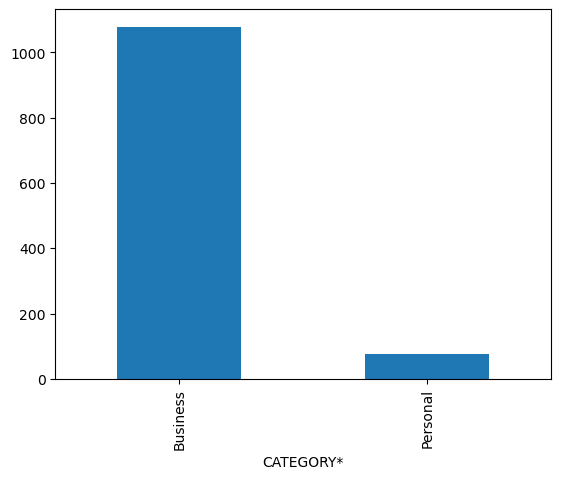

In [37]:
uber_data['CATEGORY*'].value_counts().plot(kind='bar')

**What percentage of trips are business versus personal?**

In [36]:
uber_data['CATEGORY*'].value_counts()/ len(uber_data) * 100

CATEGORY*
Business    93.252595
Personal     6.660900
Name: count, dtype: float64